In [1]:
pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.6 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 4.9 MB/s  0:00:01 eta 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('/Users/asifmddev/Downloads/Ipo Dashboard Final/IPO.csv') # Or whatever you named the file

# First inspection
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                302 non-null    object 
 1   IPO_Name            302 non-null    object 
 2   Issue_Size(crores)  302 non-null    float64
 3   QIB                 302 non-null    float64
 4   HNI                 302 non-null    float64
 5   RII                 302 non-null    float64
 6   Issue_price         302 non-null    float64
 7   Listing_Open        302 non-null    float64
 8   Listing_Close       302 non-null    float64
 9   Listing_Gains(%)    302 non-null    float64
 10  CMP                 302 non-null    object 
 11  Current_gains       300 non-null    float64
dtypes: float64(9), object(3)
memory usage: 28.4+ KB
None
       Date         IPO_Name  Issue_Size(crores)    QIB     HNI    RII  \
0  16-02-22  Vedant Fashions             3149.00   7.49    1.07   0.39   
1  

In [3]:
print(df.columns)

Index(['Date', 'IPO_Name', 'Issue_Size(crores)', 'QIB', 'HNI', 'RII',
       'Issue_price', 'Listing_Open', 'Listing_Close', 'Listing_Gains(%)',
       'CMP', 'Current_gains'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                302 non-null    object 
 1   IPO_Name            302 non-null    object 
 2   Issue_Size(crores)  302 non-null    float64
 3   QIB                 302 non-null    float64
 4   HNI                 302 non-null    float64
 5   RII                 302 non-null    float64
 6   Issue_price         302 non-null    float64
 7   Listing_Open        302 non-null    float64
 8   Listing_Close       302 non-null    float64
 9   Listing_Gains(%)    302 non-null    float64
 10  CMP                 302 non-null    object 
 11  Current_gains       300 non-null    float64
dtypes: float64(9), object(3)
memory usage: 28.4+ KB


In [5]:
# Clean the 'CMP' column (which is a string)
# We remove commas and then convert it to a float (number)
df['CMP'] = df['CMP'].str.replace(',', '').astype(float)

In [6]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/2c/mm1s5jh57n7fg51tkmrq8ymc0000gn/T/ipykernel_40045/2245584201.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
# Fill missing 'Current_gains' with 0
df['Current_gains'].fillna(0, inplace=True)

/var/folders/2c/mm1s5jh57n7fg51tkmrq8ymc0000gn/T/ipykernel_40045/2208182584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Current_gains'].fillna(0, inplace=True)


In [8]:
# Check your work!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                302 non-null    datetime64[ns]
 1   IPO_Name            302 non-null    object        
 2   Issue_Size(crores)  302 non-null    float64       
 3   QIB                 302 non-null    float64       
 4   HNI                 302 non-null    float64       
 5   RII                 302 non-null    float64       
 6   Issue_price         302 non-null    float64       
 7   Listing_Open        302 non-null    float64       
 8   Listing_Close       302 non-null    float64       
 9   Listing_Gains(%)    302 non-null    float64       
 10  CMP                 302 non-null    float64       
 11  Current_gains       302 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 28.4+ KB


In [9]:
df['Listing_Gain_%'] = ((df['Listing_Open'] - df['Issue_price']) / df['Issue_price']) * 100

In [10]:
# Drop rows where we couldn't calculate this (missing data)
df_cleaned = df.dropna(subset=['Listing_Gain_%', 'Issue_Size(crores)'])

In [11]:
pip install seaborn matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 3.8 MB/s  0:00:02 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.8 MB/s  0:00:00 eta 0:00:01
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]
Note: you may need to restart the kernel to use updated packages.


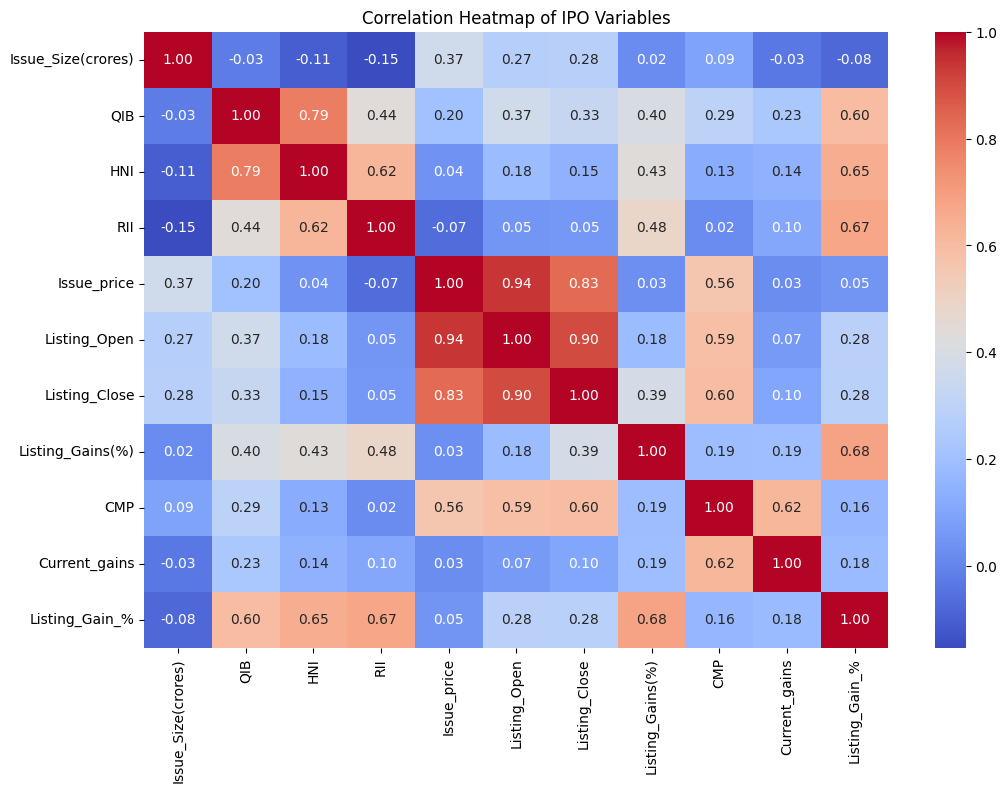

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of IPO Variables')
plt.show() # This will show the plot in your notebook

In [13]:
pip install scikit-learn

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 2.4 MB/s  0:00:03 eta 0:00:01
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 5.5 MB/s  0:00:04 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Select features (X) - Use the numeric columns you cleaned
# Let's assume 'QIB', 'HNI', 'RII' are now numeric columns named 'QIB_Subs', etc.
features = ['Issue_Size(crores)', 'QIB', 'HNI', 'RII'] # Add more as you clean them
target = 'Listing_Gain_%'

# Ensure no missing values in these specific columns
df_model = df_cleaned[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
df_cleaned = df.dropna(subset=['Listing_Gain_%', 'Issue_Size(crores)'])

In [16]:
# This is the line you already have
df['Listing_Gain_%'] = ((df['Listing_Open'] - df['Issue_price']) / df['Issue_price']) * 100

# ADD THIS NEW LINE:
df['Listing_Gain_%'].replace([np.inf, -np.inf], np.nan, inplace=True)

/var/folders/2c/mm1s5jh57n7fg51tkmrq8ymc0000gn/T/ipykernel_40045/87733441.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Listing_Gain_%'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1. LOAD DATA
df = pd.read_csv('/Users/asifmddev/Downloads/Ipo Dashboard Final/IPO.csv')

# 2. FIX DATA TYPES (from your previous errors)
df['CMP'] = df['CMP'].str.replace(',', '').astype(float)
df['Date'] = pd.to_datetime(df['Date'])

# 3. CREATE THE 'Issue_Size_Cr' COLUMN
df['Issue_Size_Cr'] = df['Issue_Size(crores)'] # Just copying the column as it's already a float

# 4. CREATE THE 'Listing_Gain_%' COLUMN (THE CRITICAL PART)
# Calculate...
df['Listing_Gain_%'] = ((df['Listing_Open'] - df['Issue_price']) / df['Issue_price']) * 100
# ...and IMMEDIATELY fix the infinity error
df['Listing_Gain_%'].replace([np.inf, -np.inf], np.nan, inplace=True)

# 5. DEFINE YOUR FEATURES AND TARGET
features = ['Issue_Size_Cr', 'QIB', 'HNI', 'RII']
target = 'Listing_Gain_%'

# 6. CREATE THE FINAL CLEANED DATAFRAME
# This .dropna() will now remove both missing values AND the 'inf' values you changed to 'nan'
df_cleaned = df.dropna(subset=features + [target])

# 7. CREATE X AND y (from the fully cleaned data)
X = df_cleaned[features]
y = df_cleaned[target]

# 8. CREATE YOUR TRAINING/TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. FINAL CHECK (This should print 0)
print(f"Rows in final training data: {len(X_train)}")
print(f"Infinity values in y_train: {np.isinf(y_train).sum()}")

Rows in final training data: 240
Infinity values in y_train: 0


/var/folders/2c/mm1s5jh57n7fg51tkmrq8ymc0000gn/T/ipykernel_40045/2686057220.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
/var/folders/2c/mm1s5jh57n7fg51tkmrq8ymc0000gn/T/ipykernel_40045/2686057220.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Listing_Gain_%'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [18]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test the model
predictions = model.predict(X_test)

print("Model trained successfully!")

Model trained successfully!


In [19]:
import sys
print(sys.executable)


/opt/homebrew/opt/python@3.10/bin/python3.10


In [20]:
pip install streamlit

  Using cached streamlit-1.50.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-6.2.1-py3-none-any.whl.metadata (5.5 kB)
  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached protobuf-6.33.0-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached gitpython-3.1.45-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached narwhals-2.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
 

In [21]:
import joblib

# Ensure 'model' is your trained model variable
joblib.dump(model, 'ipo_model.pkl')

# Ensure 'df_cleaned' is your final, clean data
df_cleaned.to_csv('ipo_cleaned.csv', index=False)

print("Model and data saved successfully!")

Model and data saved successfully!


2025-10-27 20:44:13.337 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 20:44:13.337 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 20:44:13.411 
  command:

    streamlit run /Users/asifmddev/Library/Python/3.10/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-10-27 20:44:13.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 20:44:13.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 20:44:13.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 20:44:13.412 Thread 'MainThread': missing ScriptRunContext! This warning can b

DeltaGenerator()

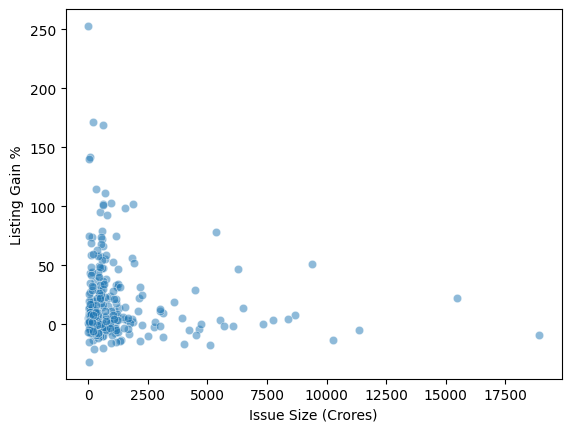

In [22]:
import streamlit as st
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model and cleaned data
model = joblib.load('ipo_model.pkl')
df = pd.read_csv('ipo_cleaned.csv')

# --- App Layout ---
st.set_page_config(layout="wide")
st.title('📈 Indian IPO Analysis & Listing Gain Predictor')

# --- Sidebar for Prediction ---
st.sidebar.header('🔮 Predict Listing Gains')
st.sidebar.write('Tune these parameters to see the predicted gain.')

# Create sliders and inputs for model features
issue_size = st.sidebar.slider('Issue Size (Crores)', float(df['Issue_Size_Cr'].min()), float(df['Issue_Size_Cr'].max()), float(df['Issue_Size_Cr'].mean()))
qib = st.sidebar.slider('QIB Subscription (times)', 0.0, 250.0, 50.0) # Adjust min/max as needed
hni = st.sidebar.slider('HNI Subscription (times)', 0.0, 400.0, 100.0) # Adjust min/max as needed
rii = st.sidebar.slider('RII Subscription (times)', 0.0, 100.0, 30.0) # Adjust min/max as needed

# Make prediction
input_data = [[issue_size, qib, hni, rii]]
prediction = model.predict(input_data)

st.sidebar.subheader(f'Predicted Listing Gain: **{prediction[0]:.2f}%**')

# --- Main Page for Analysis ---
st.header('IPO Data Analysis')

# Show a chart
st.subheader('Listing Gains vs. Issue Size')
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Issue_Size_Cr', y='Listing_Gain_%', alpha=0.5, ax=ax)
ax.set_xlabel('Issue Size (Crores)')
ax.set_ylabel('Listing Gain %')
st.pyplot(fig)

# Show raw data
st.subheader('Cleaned IPO Data')
st.dataframe(df.tail(10))